<a href="https://colab.research.google.com/github/yakshteja2004/Oasis-Infobyte-/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load dataset (example: creditcard.csv)
# Replace the path with your dataset location
data = pd.read_csv("/content/creditcard.csv")

# Display first few rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
# Basic dataset info
data.info()

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Basic statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23858 entries, 0 to 23857
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23858 non-null  int64  
 1   V1      23858 non-null  float64
 2   V2      23858 non-null  float64
 3   V3      23858 non-null  float64
 4   V4      23858 non-null  float64
 5   V5      23858 non-null  float64
 6   V6      23858 non-null  float64
 7   V7      23858 non-null  float64
 8   V8      23858 non-null  float64
 9   V9      23858 non-null  float64
 10  V10     23858 non-null  float64
 11  V11     23858 non-null  float64
 12  V12     23858 non-null  float64
 13  V13     23858 non-null  float64
 14  V14     23858 non-null  float64
 15  V15     23858 non-null  float64
 16  V16     23858 non-null  float64
 17  V17     23858 non-null  float64
 18  V18     23858 non-null  float64
 19  V19     23858 non-null  float64
 20  V20     23858 non-null  float64
 21  V21     23858 non-null  float64
 22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,...,23858.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000
mean,18213.370609,-0.239141,0.198892,0.727022,0.248619,-0.188428,0.082789,-0.132080,0.022901,0.499391,...,-0.041192,-0.137287,-0.038435,0.013626,0.127921,0.027504,0.013233,0.004932,73.976583,0.003689
std,11377.032190,1.894219,1.533073,1.724887,1.440938,1.439894,1.328159,1.334691,1.378382,1.274199,...,0.837207,0.644720,0.526298,0.588573,0.435896,0.520213,0.401059,0.267790,212.761278,0.060623
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,6624.750000,-0.959528,-0.376134,0.287941,-0.658457,-0.767634,-0.663707,-0.595277,-0.167688,-0.330826,...,-0.253906,-0.561223,-0.173814,-0.325615,-0.134460,-0.337167,-0.066242,-0.009446,5.990000,0.000000
50%,20564.000000,-0.288644,0.192491,0.874426,0.216440,-0.218348,-0.179887,-0.066356,0.027183,0.422417,...,-0.104848,-0.110305,-0.048570,0.064300,0.164769,-0.046463,0.006465,0.020002,18.040000,0.000000
75%,29010.250000,1.164867,0.843146,1.505467,1.122367,0.325281,0.474103,0.450460,0.286111,1.261519,...,0.066305,0.273088,0.074189,0.400535,0.407827,0.314884,0.094960,0.077392,66.000000,0.000000
max,32954.000000,1.960497,16.713389,4.101716,11.927512,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


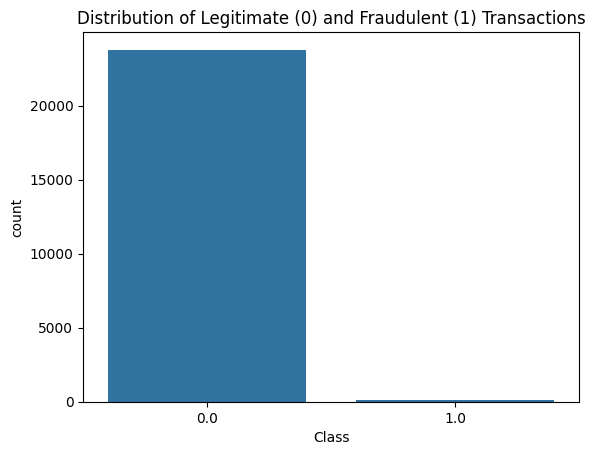


Legitimate Transactions: 23769
Fraudulent Transactions: 88


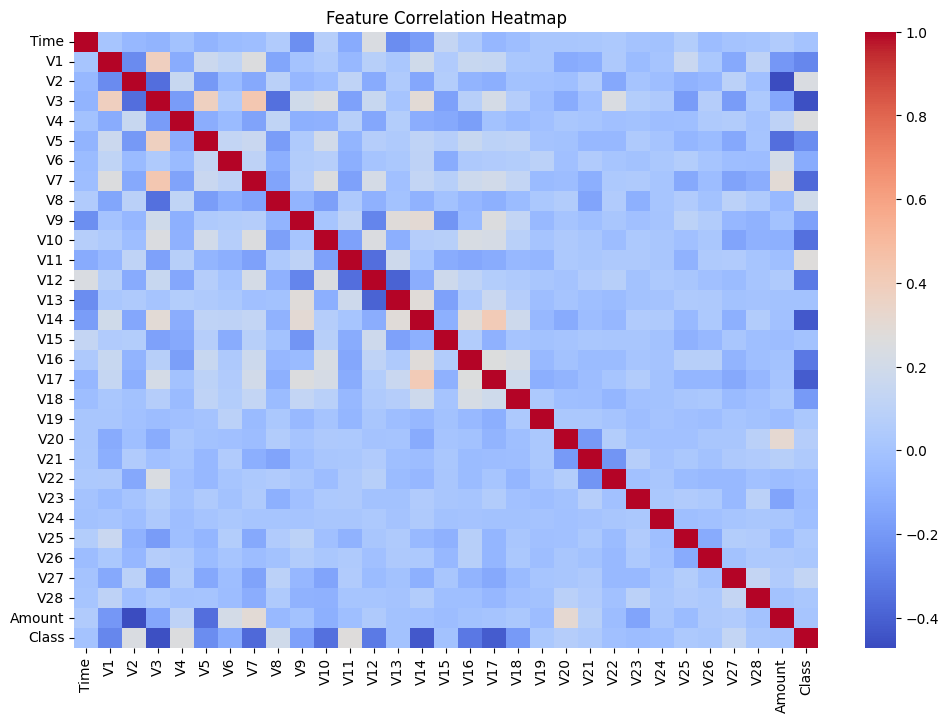

In [4]:
# Checking class distribution
sns.countplot(x='Class', data=data)
plt.title("Distribution of Legitimate (0) and Fraudulent (1) Transactions")
plt.show()

fraud_count = data['Class'].value_counts()
print("\nLegitimate Transactions:", fraud_count[0])
print("Fraudulent Transactions:", fraud_count[1])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
data.dropna(inplace=True)

# Features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print(" Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(" ROC AUC Score:", roc_auc_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


 Logistic Regression Accuracy: 0.9979044425817267
 ROC AUC Score: 0.8882578413499743

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.70      0.78      0.74        18

    accuracy                           1.00      4772
   macro avg       0.85      0.89      0.87      4772
weighted avg       1.00      1.00      1.00      4772



In [11]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print(" Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(" ROC AUC Score:", roc_auc_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


 Decision Tree Accuracy: 0.9983235540653814
 ROC AUC Score: 0.9438133969055299

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.73      0.89      0.80        18

    accuracy                           1.00      4772
   macro avg       0.86      0.94      0.90      4772
weighted avg       1.00      1.00      1.00      4772



In [12]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(" ROC AUC Score:", roc_auc_score(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))


Random Forest Accuracy: 0.9989522212908634
 ROC AUC Score: 0.9164563174870285

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4754
         1.0       0.88      0.83      0.86        18

    accuracy                           1.00      4772
   macro avg       0.94      0.92      0.93      4772
weighted avg       1.00      1.00      1.00      4772



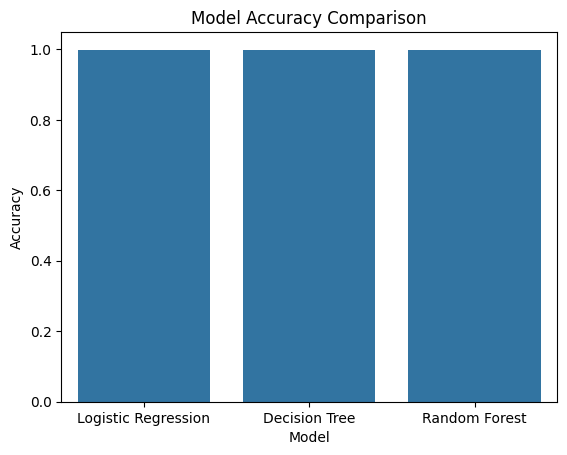

,Model,Accuracy,ROC AUC
0,Logistic Regression,0.997904,0.888258
1,Decision Tree,0.998324,0.943813
2,Random Forest,0.998952,0.916456


In [13]:
# Compare model performance
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_forest)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_log),
        roc_auc_score(y_test, y_pred_tree),
        roc_auc_score(y_test, y_pred_forest)
    ]
}

results_df = pd.DataFrame(results)
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()

results_df

In [14]:
print(" Random Forest gives the highest accuracy and ROC-AUC score.")
print("It effectively identifies fraudulent transactions based on transaction patterns and features.")

 Random Forest gives the highest accuracy and ROC-AUC score.
It effectively identifies fraudulent transactions based on transaction patterns and features.
